# CLASIFICACIÓN DE SOLICITUDES DE CRÉDITO UTILIZANDO DEEP LEARNING

## MODELOS DE CLASIFICACIÓN

In [122]:
import warnings
warnings.filterwarnings("ignore")

## Importe librerías

In [123]:
import pandas as pd
import numpy as np

In [124]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [125]:
import matplotlib.lines as mlines
from sklearn import preprocessing 

## Importe de datos

Los datos se importan desde el NOTEBOOK preprocesamiento

In [126]:
df = pd.read_pickle('HCData.pkl')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PCB_Canceled,PCB_Demand,PCB_Returned_store,PCB_Signed,pcb_FUTURE_mean,pcb_FUTURE_min,pcb_FUTURE_max,pcb_DPD_mean,pcb__DPD_min,pcb__DPD_max
0,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0,0,0,0,34.324324,0.0,60.0,0.0,0,0
1,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0,0,0,0,34.324324,0.0,60.0,0.0,0,0
2,100048,0,1,1,0,1,202500.0,604152.0,-475,-3148.0,...,0,0,0,0,13.437500,0.0,18.0,0.0,0,0
3,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,0,0,0,0,16.500000,9.0,24.0,0.0,0,0
4,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,0,0,0,0,16.500000,9.0,24.0,0.0,0,0


In [127]:
dfD = pd.get_dummies(df.CREDIT_ACTIVE)

In [128]:
dfD = dfD.rename({
    "Active":'TT_CREDIT_ACTIVE_Active',
    "Closed":'TT_CREDIT_ACTIVE_Closed',
    "Sold":'TT_CREDIT_ACTIVE_Sold'
})

dfD = dfD.drop(['Bad debt'], axis = 1)

df = pd.concat([df, dfD], axis = 1)

In [129]:
df = df.drop(['CREDIT_ACTIVE'], axis = 1)

## Definición de conjuntos Y y X

In [130]:
Y = df.TARGET
X = df.drop(['TARGET', 'SK_ID_CURR'], axis = 1)

## Perfiles de Usuario

In [131]:
# normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

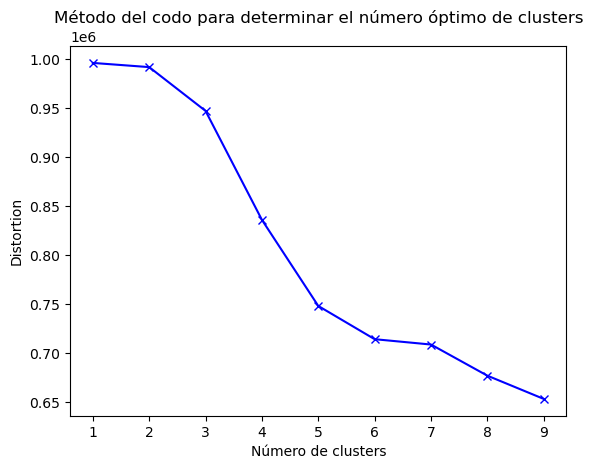

In [140]:
#*Método del codo:*

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Graficar la variación de la suma de distancias en función del número de clusters
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

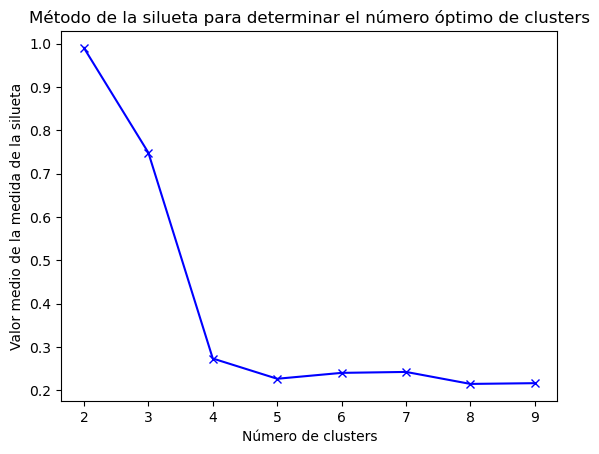

In [19]:
#*Método de la silueta:*

from sklearn.metrics import silhouette_score

# Evaluar la calidad del clustering utilizando el método de la silueta
silhouette_scores = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Graficar la variación del valor medio de la medida de la silueta en función del número de clusters
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor medio de la medida de la silueta')
plt.title('Método de la silueta para determinar el número óptimo de clusters')
plt.show()

In [ ]:
#%pip install gap-stat

In [ ]:
#*Método de la gap statistic:*

"""from scipy.spatial.distance import cdist
from gap_statistic import OptimalK

# Calcular la medida de la gap statistic para diferentes valores de k
optimalK = OptimalK(n_jobs=-1)
n_clusters = optimalK(X, cluster_array=np.arange(1, 10))
print('Número óptimo de clusters:', n_clusters)

# Graficar la variación de la medida de la gap statistic en función del número de clusters
gap_df = optimalK.gap_df_
plt.plot(gap_df.n_clusters, gap_df.gap_value, linestyle='--', marker='o', color='b')
plt.ylabel('Gap Value')
plt.xlabel('Número de clusters')
plt.title('Método de la gap statistic para determinar el número óptimo de clusters')
plt.show()"""

In [132]:
#KMEANS
from sklearn.cluster import KMeans
# entrenar modelo k-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# obtener etiquetas de cluster y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [133]:
clusters = pd.DataFrame(labels, 
                    columns=['CLUSTER'])
clusters.head()

,CLUSTER
0,0
1,0
2,3
3,3
4,3


In [135]:
pu = pd.concat([df, clusters], axis = 1)

## PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [14]:
# PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

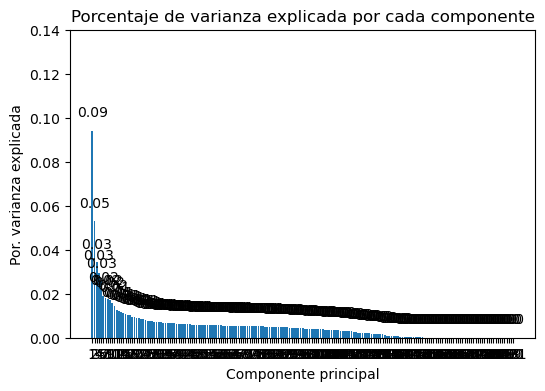

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.14)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.09411725 0.1470073  0.18122922 0.21056426 0.2363638  0.25543551
 0.27356175 0.29133649 0.30835499 0.32413768 0.33876396 0.3512113
 0.36356644 0.37527301 0.38632746 0.39731796 0.40786353 0.41804678
 0.42760746 0.43700181 0.44612998 0.45492135 0.46358287 0.47220089
 0.48047285 0.4882508  0.49577137 0.50314811 0.51038386 0.51755563
 0.52462185 0.53163064 0.53850343 0.54526781 0.55198433 0.55866726
 0.56526848 0.57182915 0.57828913 0.58465428 0.59092755 0.59715183
 0.60325653 0.60934468 0.61537299 0.62137109 0.62736007 0.63325603
 0.63914707 0.64500704 0.65084763 0.65664802 0.66239336 0.66812852
 0.67380726 0.67944024 0.6850566  0.69066022 0.69622695 0.70177538
 0.70730136 0.71280866 0.71830264 0.72378075 0.72923766 0.73468457
 0.74012711 0.74553522 0.75093545 0.75632377 0.76165675 0.76696577
 0.77225974 0.77750464 0.78272504 0.78790692 0.7930606  0.79818882
 

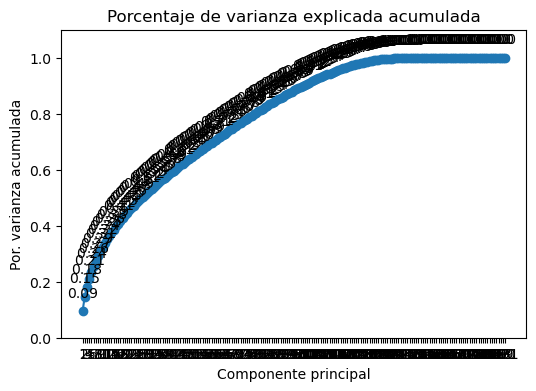

In [185]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

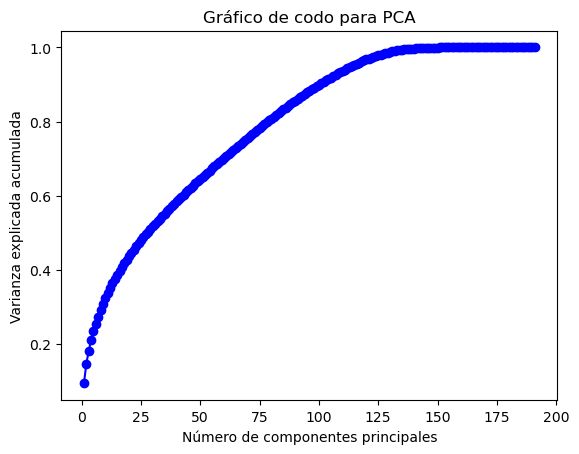

In [186]:
#pca = PCA()

# ajustar PCA a los datos
#pca.fit(X)

variance_ratio = modelo_pca.explained_variance_ratio_

# calcular la suma acumulativa de la varianza explicada
cumulative_variance_ratio = [sum(variance_ratio[:i+1]) for i in range(len(variance_ratio))]

# crear el gráfico de codo
fig, ax = plt.subplots()
ax.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, 'bo-')
ax.set_xlabel('Número de componentes principales')
ax.set_ylabel('Varianza explicada acumulada')
ax.set_title('Gráfico de codo para PCA')

plt.show()

In [15]:
valores_propios_df = pd.DataFrame({'Componente': range(1, modelo_pca.n_components_+1),
                                   'Valor propio': modelo_pca.explained_variance_})

In [16]:
len(valores_propios_df[valores_propios_df['Valor propio'] > 1])

62

In [17]:
valores_propios_df[valores_propios_df['Valor propio'] > 1]

,Componente,Valor propio
0,1,17.129437
1,2,9.626042
2,3,6.228425
3,4,5.339008
4,5,4.695542
...,...,...
57,58,1.019864
58,59,1.013150
59,60,1.009820
60,61,1.005734


In [18]:
X_transformado = modelo_pca.transform(X)[:, :62]

In [19]:
XPCA = pd.DataFrame(X_transformado, 
                    columns=['COMP1', 'COMP2','COMP3','COMP4','COMP5','COMP6','COMP7','COMP8','COMP9','COMP10',
                            'COMP11', 'COMP12','COMP13','COMP14','COMP15','COMP16','COMP17','COMP18','COMP19','COMP20',
                            'COMP21', 'COMP22','COMP23','COMP24','COMP25','COMP26','COMP27','COMP28','COMP29','COMP30',
                            'COMP31', 'COMP32','COMP33','COMP34','COMP35','COMP36','COMP37','COMP38','COMP39','COMP40',
                            'COMP41', 'COMP42','COMP43','COMP44','COMP45','COMP46','COMP47','COMP48','COMP49','COMP50',
                            'COMP51', 'COMP52','COMP53','COMP54','COMP55','COMP56','COMP57','COMP58','COMP59','COMP60',
                            'COMP61', 'COMP62'])
XPCA.head()

,COMP1,COMP2,COMP3,COMP4,COMP5,COMP6,COMP7,COMP8,COMP9,COMP10,...,COMP53,COMP54,COMP55,COMP56,COMP57,COMP58,COMP59,COMP60,COMP61,COMP62
0,235459.914914,-210110.320070,-600055.558625,193618.607120,405119.850054,-609681.764653,-217628.035838,330298.209507,203800.814835,400995.924875,...,684517.409590,854946.718631,325191.073854,-425769.935116,90862.073507,-514884.552107,99903.594348,-411670.914943,-164676.893812,633269.867058
1,237223.963550,-208248.287409,-590531.997705,207623.101643,403577.970349,-606210.242173,-207920.375445,318244.610521,200662.322789,382778.344477,...,697151.244588,849223.112939,326016.763970,-430065.506275,84791.862652,-501395.244253,103691.345450,-423794.206333,-151386.885642,649255.793213
2,131640.360861,-128759.328878,-312622.363222,114354.074298,196317.293287,-345058.573942,-125756.778968,202291.677606,105388.639714,212067.414609,...,575127.854039,734498.444983,245997.428453,-385102.656172,72034.463984,-434681.250820,101581.963688,-345351.889623,-158432.801361,551469.160865
3,45653.029601,-76144.700820,-105180.641276,63602.531703,-56990.431474,-214957.978331,-7651.579633,48300.471374,35628.464249,77533.821964,...,653746.143517,894961.304074,239972.443023,-471360.238190,74735.212999,-526351.625462,133355.763687,-370190.485713,-226929.298836,649869.184435
4,45802.242140,-75967.684161,-104265.377086,65028.386670,-57090.222794,-214597.386237,-6761.854534,47215.732235,35330.413863,75718.087769,...,653354.808096,895589.373003,240386.872188,-470987.512148,73869.865410,-524931.461969,133951.883253,-371530.157012,-225716.515700,651650.284456


In [20]:
XPCA = pd.concat([XPCA, clusters], axis = 1)

In [21]:
# Obtener la matriz de carga de PCA
matriz_carga_pca = modelo_pca.components_

# Crear un DataFrame a partir de la matriz de carga de PCA
df_carga_pca = pd.DataFrame(matriz_carga_pca, 
                            columns=["Componente {}".format(i+1) for i in range(matriz_carga_pca.shape[0])], index=X.columns)

df_carga_pca = df_carga_pca.iloc[:, :62]

# Imprimir el DataFrame
df_carga_pca

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7,Componente 8,Componente 9,Componente 10,...,Componente 53,Componente 54,Componente 55,Componente 56,Componente 57,Componente 58,Componente 59,Componente 60,Componente 61,Componente 62
NAME_CONTRACT_TYPE,-0.003059,1.171632e-02,-7.287943e-03,2.003759e-02,7.961989e-03,-1.604544e-02,1.318573e-02,4.409983e-03,7.432770e-04,8.470329e-22,...,0.006677,0.001756,-0.005335,0.002523,0.004490,-0.002474,0.001049,-0.001663,0.001775,-0.005197
CODE_GENDER,-0.005368,-1.936530e-03,-1.804525e-02,2.567910e-02,-2.854642e-02,-5.444502e-02,-5.388213e-03,2.624084e-02,2.393343e-02,-2.168404e-19,...,0.012599,-0.002789,-0.002285,-0.001498,-0.004188,-0.005447,0.000148,0.004933,0.004786,-0.000059
FLAG_OWN_CAR,0.006959,-3.218196e-02,3.176018e-02,-5.706619e-03,-6.259093e-02,-2.867077e-02,-4.551968e-02,2.944714e-02,-1.156074e-02,-5.551115e-17,...,0.024417,0.017007,0.006927,-0.010430,-0.004106,0.005506,0.000340,0.010311,-0.001027,-0.000145
FLAG_OWN_REALTY,-0.011432,3.159567e-02,-2.573461e-02,1.934296e-02,1.492936e-04,1.705591e-02,6.429031e-02,-3.870625e-02,-3.690918e-02,-5.551115e-17,...,-0.018442,-0.007505,-0.008279,0.004969,0.003008,0.000301,-0.005270,-0.005434,-0.004386,0.004823
AMT_INCOME_TOTAL,0.010133,-6.760745e-02,6.771898e-02,-1.358103e-02,7.864489e-02,2.244040e-02,-1.339004e-01,7.160267e-02,4.498114e-02,-1.110223e-16,...,0.017177,0.003852,0.015827,0.001061,0.005055,0.000087,0.003213,-0.006165,-0.002882,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pcb__DPD_min,-0.000000,-2.038279e-17,-1.816869e-17,7.509252e-17,-5.830042e-17,-1.093499e-16,2.554592e-15,6.756975e-17,7.449998e-17,1.241937e-01,...,-0.040739,-0.037765,-0.046581,-0.043310,-0.041789,-0.036034,-0.024873,-0.045423,-0.044112,-0.045529
pcb__DPD_max,0.000000,-6.666770e-17,7.827350e-17,1.120213e-16,-1.353110e-17,1.348361e-16,9.399768e-16,5.224707e-17,8.036178e-17,2.231559e-02,...,-0.022098,-0.020485,-0.025267,-0.007742,-0.007470,-0.006441,-0.004446,-0.008119,-0.007885,-0.008138
Active,0.000000,1.540651e-16,-5.539799e-17,-2.221090e-18,4.262628e-17,-8.836023e-17,4.065524e-15,-6.866418e-17,-9.079171e-17,-1.932688e-01,...,-0.008193,-0.007595,-0.009368,-0.075444,-0.072795,-0.062769,-0.043328,-0.079126,-0.076842,-0.079309
Closed,-0.000000,1.908196e-17,-6.862445e-17,-4.891734e-17,-7.197932e-17,6.462431e-17,8.080918e-16,3.408443e-18,-1.624628e-16,-2.812323e-01,...,0.009296,0.008618,0.010629,0.009181,0.008859,0.007639,0.005273,0.009629,0.009351,0.009652


In [121]:
df_carga_pca[df_carga_pca['Componente 1'] > 0.1]['Componente 1']

PAPP_AMT_CREDIT_max             0.157382
PAPP_SELLERPLACE_AREA_mean      0.285157
PAPP_SELLERPLACE_AREA_min       0.389565
PAPP_CONTRACT_TYPE_REVOLVING    0.172062
PAPP_WEDNESDAY                  0.165293
Name: Componente 1, dtype: float64

In [83]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [185]:
pu['tasaApro'] = pu['PAPP_STATUS_Approved'] / pu['PAPP_AMT_CREDIT_count']

In [122]:
# Agrupar el DataFrame por la variable categórica
grupos = pu.groupby('CLUSTER')

# Calcular las medidas de estadística descriptiva personalizadas para la variable continua en cada grupo
resultados = grupos['tasaApro'].agg([np.mean, np.std, np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

# Renombrar las columnas
resultados.columns = ['Media', 'Desviación Estándar', 'Mediana', 'Rango Intercuartílico']
resultados

,Media,Desviación Estándar,Mediana,Rango Intercuartílico
CLUSTER,,,,
0,0.637969,0.185714,0.636364,0.277778
1,0.735571,0.243635,0.750000,0.444444
2,0.341764,0.138095,0.333333,0.199405
3,0.693290,0.233971,0.666667,0.500000


In [140]:
# Agrupar los datos por cluster y variable categórica, y calcular la cuenta
df_grouped = pu.groupby(['CLUSTER', 'Curr_App_OT_XNA']).size().reset_index(name='Count')

# Calcular el total de la cuenta por cluster
df_total = pu.groupby('CLUSTER').size().reset_index(name='Total')

# Unir los DataFrames y calcular el porcentaje
df_result = df_grouped.merge(df_total, on='CLUSTER')
df_result['Percentage'] = df_result['Count'] / df_result['Total'] * 100

# Imprimir el resultado
df_result

,CLUSTER,Curr_App_OT_XNA,Count,Total,Percentage
0,0,0,37484,43892,85.400529
1,0,1,6408,43892,14.599471
2,1,0,37775,44915,84.103306
3,1,1,7140,44915,15.896694
4,2,0,11013,13767,79.995642
5,2,1,2754,13767,20.004358
6,3,0,64470,74114,86.987614
7,3,1,9644,74114,13.012386


In [130]:
df_grouped = pu.groupby('CLUSTER')['Curr_App_OT_Educational'].sum().reset_index()
df_grouped

,CLUSTER,Curr_App_OT_Educational
0,0,2456
1,1,3017
2,2,733
3,3,4650


In [129]:
# Agrupar los datos por CLUSTER y calcular la suma de AMT_CREDIT
df_grouped = pu.groupby('CLUSTER')['AMT_CREDIT'].sum()

# Calcular la suma de AMT_CREDIT para cartera vencida por CLUSTER
df_vencida = pu[pu['TARGET'] == 1]
df_vencida_grouped = df_vencida.groupby('CLUSTER')['AMT_CREDIT'].sum()

# Calcular el porcentaje de cartera vencida por CLUSTER
porcentaje_vencida = (1 - df_vencida_grouped / df_grouped) * 100

# Mostrar el resultado
porcentaje_vencida

CLUSTER
0    91.684410
1    93.770032
2    85.689972
3    91.049867
Name: AMT_CREDIT, dtype: float64

In [49]:
pu1 = pu[['TARGET','CLUSTER', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'PAPP_AMT_CREDIT_mean', 'PAPP_AMT_CREDIT_count', 'CODE_GENDER', 'CURR_APP_MARRIED', 'FLAG_OWN_REALTY', 'CURR_APP_EDUCATION_HIGHER', 'Curr_App_OT_Educational',
       'Curr_App_OT_GOB', 'Curr_App_OT_Medicine', 'Curr_App_OT_Other', 'Curr_App_OT_Self-employed', 'Curr_App_OT_XNA', 'Curr_App_OT_business', 'Curr_App_OT_financial',
       'Curr_App_OT_industry', 'Curr_App_OT_service', 'PAPP_CLIENT_TYPE_New', 'PAPP_THURSDAY', 'FLAG_PHONE', 'PAPP_STATUS_Refused', 'PAPP_STATUS_Approved', 'FLAG_DOCUMENT_2',
        'PAPP_TUESDAY', 'PAPP_WEDNESDAY', 'FLAG_DOCUMENT_12', 'PAPP_SUNDAY', 'AMT_CREDIT_SUM', 'cc_Sent_proposal', 'PCB_Active', 'PCB_Demand', 'Closed']]

In [50]:
pu1['AMT_CREDIT'] = np.where(pu1['AMT_CREDIT'] >= pu1['AMT_CREDIT'].mean(), 1, 0)

In [51]:
pu1['AMT_INCOME_TOTAL'] = np.where(pu1['AMT_INCOME_TOTAL'] >= pu1['AMT_INCOME_TOTAL'].mean(), 1, 0)
pu1['PAPP_AMT_CREDIT_mean'] = np.where(pu1['PAPP_AMT_CREDIT_mean'] >= pu1['PAPP_AMT_CREDIT_mean'].mean(), 1, 0)
pu1['PAPP_AMT_CREDIT_count'] = np.where(pu1['PAPP_AMT_CREDIT_count'] >= pu1['PAPP_AMT_CREDIT_count'].mean(), 1, 0)
pu1['AMT_CREDIT_SUM'] = np.where(pu1['AMT_CREDIT_SUM'] >= pu1['AMT_CREDIT_SUM'].mean(), 1, 0)

In [101]:
pu2 = pu[['TARGET','CLUSTER', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'PAPP_AMT_CREDIT_mean', 'PAPP_AMT_CREDIT_count', 'CODE_GENDER', 'CURR_APP_MARRIED', 'FLAG_OWN_REALTY', 'CURR_APP_EDUCATION_HIGHER', 'Curr_App_OT_Educational',
       'Curr_App_OT_GOB', 'Curr_App_OT_Medicine', 'Curr_App_OT_Other', 'Curr_App_OT_Self-employed', 'Curr_App_OT_XNA', 'Curr_App_OT_business', 'Curr_App_OT_financial',
       'Curr_App_OT_industry', 'Curr_App_OT_service', 'PAPP_CLIENT_TYPE_New', 'PAPP_THURSDAY', 'FLAG_PHONE', 'PAPP_STATUS_Refused', 'PAPP_STATUS_Approved', 'FLAG_DOCUMENT_2',
        'PAPP_TUESDAY', 'PAPP_WEDNESDAY', 'FLAG_DOCUMENT_12', 'PAPP_SUNDAY', 'AMT_CREDIT_SUM', 'cc_Sent_proposal', 'PCB_Active', 'PCB_Demand', 'Closed']]
pu2 = pu2[pu2['CLUSTER'] == 3]

In [102]:
pu2['AMT_CREDIT'] = np.where(pu2['AMT_CREDIT'] >= pu2['AMT_CREDIT'].mean(), 1, 0)
pu2['AMT_INCOME_TOTAL'] = np.where(pu2['AMT_INCOME_TOTAL'] >= pu2['AMT_INCOME_TOTAL'].mean(), 1, 0)
pu2['PAPP_AMT_CREDIT_mean'] = np.where(pu2['PAPP_AMT_CREDIT_mean'] >= pu2['PAPP_AMT_CREDIT_mean'].mean(), 1, 0)
pu2['PAPP_AMT_CREDIT_count'] = np.where(pu2['PAPP_AMT_CREDIT_count'] >= pu2['PAPP_AMT_CREDIT_count'].mean(), 1, 0)
pu2['AMT_CREDIT_SUM'] = np.where(pu2['AMT_CREDIT_SUM'] >= pu2['AMT_CREDIT_SUM'].mean(), 1, 0)

In [107]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Crear una lista de tablas de contingencia para cada pregunta
tables_by_question = []
target_column = 'TARGET'
questions = pu2.columns[2:]  # Excluir las primeras dos columnas

for question in questions:
    table = pd.crosstab(index=pu2[target_column], columns=pu2[question])
    tables_by_question.append(table)

# Realizar pruebas de chi-cuadrado para cada tabla de contingencia
chi2_tests = []
for table in tables_by_question:
    _, p_value, _, stat = chi2_contingency(table)
    chi2_tests.append((stat[0][0], p_value))  # Acceder al primer valor del array de estadísticos

# Crear un dataframe con los resultados
result = pd.DataFrame({
    'stat': [test[0] for test in chi2_tests],
    'p': [test[1] for test in chi2_tests],
    'question': range(1, len(questions) + 1)
})
# Eliminar filas con valores faltantes
result = result.dropna()

# Mostrar los primeros 5 registros
result


,stat,p,question
0,39475.967806,7.890297e-32,1
1,40408.670049,5.335046e-02,2
2,42199.133308,2.717518e-03,3
3,34491.924846,1.151483e-26,4
4,20820.117144,1.020968e-45,5
5,15254.602504,3.424464e-01,6
6,17563.333999,4.000218e-02,7
7,45948.903311,3.397524e-48,8
8,62719.485549,1.963924e-06,9
9,61315.466201,1.081997e-03,10


In [104]:
# Calcular el tamaño de los puntos
# Calcular el tamaño de los puntos
result['size'] = 2 * result['stat'].apply(np.max) / np.nanmax(result['stat'])

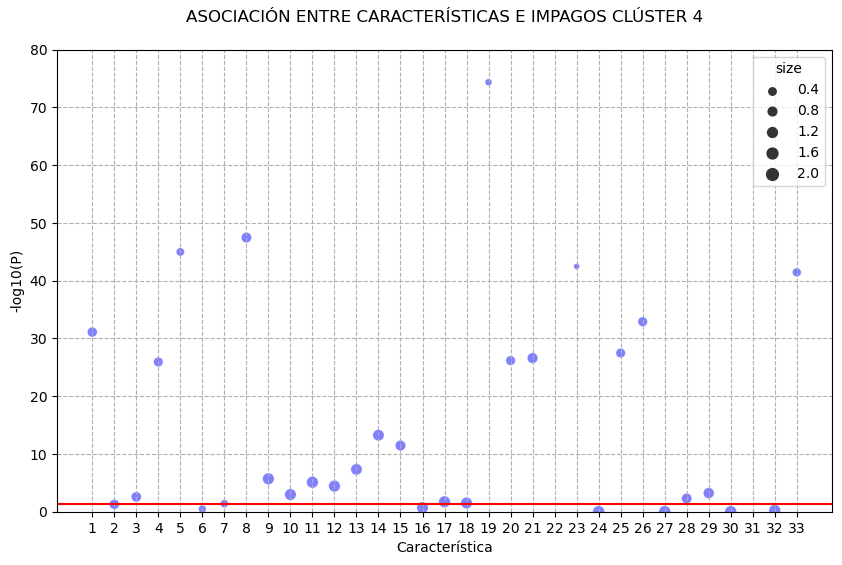

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular el tamaño de los puntos
result['size'] = 2 * result['stat'] / np.max(result['stat'])

# Generar el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='question', y=-np.log10(result['p']), size='size', alpha=0.5, color='blue')
plt.ylim(0, 80)
plt.axhline(y=-np.log10(0.05), color='red')
plt.title("ASOCIACIÓN ENTRE CARACTERÍSTICAS E IMPAGOS CLÚSTER 4", pad=20)
plt.xlabel("Característica")
plt.ylabel("-log10(P)")
plt.xticks(result['question'])
plt.grid(True, linestyle='--')
plt.show()

In [138]:
pu.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,...,pcb_FUTURE_mean,pcb_FUTURE_min,pcb_FUTURE_max,pcb_DPD_mean,pcb__DPD_min,pcb__DPD_max,Active,Closed,Sold,CLUSTER
0,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,34.324324,0.0,60.0,0.0,0,0,0,1,0,0
1,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,34.324324,0.0,60.0,0.0,0,0,0,1,0,0
2,100048,0,1,1,0,1,202500.0,604152.0,-475,-3148.0,...,13.437500,0.0,18.0,0.0,0,0,0,1,0,3
3,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,16.500000,9.0,24.0,0.0,0,0,0,1,0,3
4,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,16.500000,9.0,24.0,0.0,0,0,0,1,0,3


In [186]:
pu2 = pu
pu2 = pu2.drop(pu2.loc[pu2['DAYS_EMPLOYED'] == 365243].index)

In [187]:
pu2.DAYS_EMPLOYED = round(pu2.DAYS_EMPLOYED / -365)

Text(0.5, 1.0, 'Histograma')

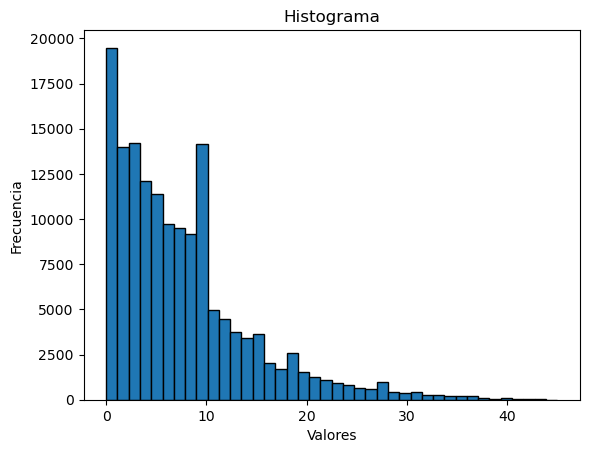

In [188]:
# Configuración del histograma
plt.hist(pu2.DAYS_EMPLOYED, bins=40, edgecolor='black')

# Etiquetas y título del histograma
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

In [189]:
# Agrupar los datos por CLUSTER y calcular la media, desviación estándar, máximo y mínimo de DAYS_EMPLOYED
days = pu2.groupby('CLUSTER')['DAYS_EMPLOYED'].agg(['mean', 'std', 'max', 'min'])

days.head()

,mean,std,max,min
CLUSTER,,,,
0,7.854124,6.477064,42.0,0.0
1,9.072826,7.375752,43.0,0.0
2,7.738309,6.343350,45.0,0.0
3,6.766543,6.313594,43.0,0.0


In [197]:
(365*0.85 )/ 12

25.854166666666668

In [207]:
# Calcular el conteo de préstamos por CLUSTER
loans = pu2.groupby(['CLUSTER', 'NAME_CONTRACT_TYPE']).size().reset_index(name='count')

# Calcular la suma de préstamos por CLUSTER
loans_sum = loans.groupby('CLUSTER')['count'].sum()

# Calcular la proporción de préstamos revolving por CLUSTER
loans['prop'] = (loans['count'] / loans_sum) * 100

# Calcular el porcentaje restante para otros tipos de préstamos por CLUSTER
loans['revolving'] = 1 - loans['prop']

# Mostrar los resultados
loans


,CLUSTER,NAME_CONTRACT_TYPE,count,prop,revolving
0,0,0,42,0.112048,0.887952
1,0,1,37442,99.118465,-98.118465
2,1,0,36,0.326886,0.673114
3,1,1,37739,58.537304,-57.537304
4,2,1,11013,NaN,NaN
5,3,0,143,NaN,NaN
6,3,1,64327,NaN,NaN


In [211]:
64327 + 143

64470

In [219]:
# Calcular el conteo de préstamos por CLUSTER
loans = pu2.groupby(['CLUSTER', 'Sold']).size().reset_index(name='count')
# Calcular la suma de préstamos por CLUSTER
loans_sum = loans.groupby('CLUSTER')['count'].sum()

# Calcular la proporción de préstamos revolving por CLUSTER
loans['prop'] = (loans['count'] / loans_sum) * 100

loans


,CLUSTER,Sold,count,prop
0,0,0,37325,99.575819
1,0,1,159,0.420913
2,1,0,37621,341.605375
3,1,1,154,0.238871
4,2,0,10966,NaN
5,2,1,47,NaN
6,3,0,64216,NaN
7,3,1,254,NaN


In [191]:
# Calcular la cantidad total de préstamos agrupados por CLUSTER, TARGET y NAME_CONTRACT_TYPE
loans1 = pu2.groupby(['CLUSTER', 'TARGET', 'NAME_CONTRACT_TYPE']).size().reset_index(name='count')

# Calcular la proporción en función del total de préstamos
loans1['prop'] = (loans1['count'] / loans1['count'].sum()) * 100

# Mostrar los resultados
loans1


,CLUSTER,TARGET,NAME_CONTRACT_TYPE,count,prop
0,0,0,0,42,0.027862
1,0,0,1,34152,22.655929
2,0,1,1,3290,2.182537
3,1,0,0,36,0.023882
4,1,0,1,35306,23.421475
5,1,1,1,2433,1.614016
6,2,0,1,9357,6.207295
7,2,1,1,1656,1.098566
8,3,0,0,143,0.094864
9,3,0,1,57863,38.385453


In [231]:
pu2.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [198]:
pu.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,...,pcb_FUTURE_min,pcb_FUTURE_max,pcb_DPD_mean,pcb__DPD_min,pcb__DPD_max,Active,Closed,Sold,CLUSTER,tasaApro
0,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0.0,60.0,0.0,0,0,0,1,0,0,0.444444
1,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0.0,60.0,0.0,0,0,0,1,0,0,0.444444
2,100048,0,1,1,0,1,202500.0,604152.0,-475,-3148.0,...,0.0,18.0,0.0,0,0,0,1,0,3,0.750000
3,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,9.0,24.0,0.0,0,0,0,1,0,3,0.666667
4,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,9.0,24.0,0.0,0,0,0,1,0,3,0.666667


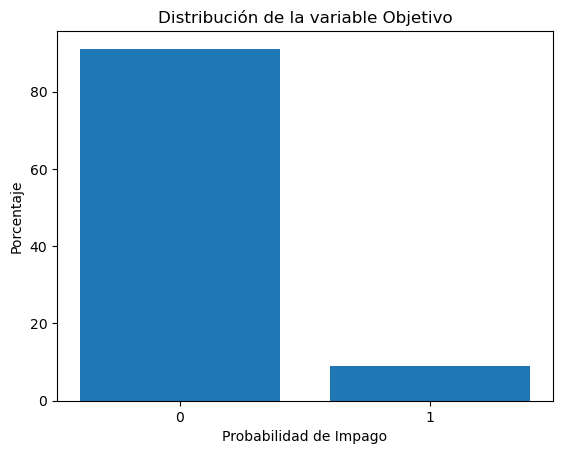

In [201]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de cada categoría en la columna 'TARGET'
target_counts = pu['TARGET'].value_counts()
target_percentages = target_counts / len(pu) * 100

# Configurar el gráfico de barras
plt.bar(target_percentages.index.astype(str), target_percentages)

# Etiquetas y título del gráfico
plt.xlabel('Probabilidad de Impago')
plt.ylabel('Porcentaje')
plt.title('Distribución de la variable Objetivo')

# Mostrar el gráfico
plt.show()

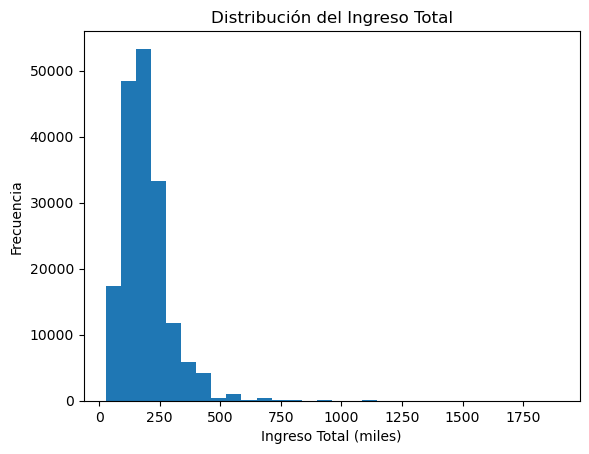

In [202]:
import matplotlib.pyplot as plt

# Dividir la columna 'AMT_INCOME_TOTAL' entre 1000
amt_income_total_divided = pu['AMT_INCOME_TOTAL'] / 1000

# Configurar el histograma
plt.hist(amt_income_total_divided, bins=30)

# Etiquetas y título del histograma
plt.xlabel('Ingreso Total (miles)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ingreso Total')

# Mostrar el histograma
plt.show()

In [221]:
pu.TARGET.value_counts()

0    161006
1     15682
Name: TARGET, dtype: int64

In [222]:
pu.TARGET.mean() * 100

8.875532011228833

In [225]:
pu.NAME_CONTRACT_TYPE.value_counts()

1    176381
0       307
Name: NAME_CONTRACT_TYPE, dtype: int64

In [226]:
pu.NAME_CONTRACT_TYPE.mean() *100

99.8262473965408

In [223]:
pu.CODE_GENDER.value_counts()

1    122724
0     53964
Name: CODE_GENDER, dtype: int64

In [224]:
pu.CODE_GENDER.mean() * 100

69.45802770986145

In [213]:
pu.Active.mean()

0.36758014126596034

In [214]:
pu.Closed.mean() 

0.6284693923752603

In [227]:
pu.Curr_App_OT_business.value_counts()

0    127687
1     49001
Name: Curr_App_OT_business, dtype: int64

In [228]:
pu.Curr_App_OT_business.mean() * 100

27.733066195780133

In [234]:
# Seleccionar las columnas de interés
columns_of_interest = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'PAPP_AMT_CREDIT_count', 'tasaApro']

# Calcular las medidas descriptivas y transponer el resultado
descriptive_stats = pu2[columns_of_interest].describe().transpose()

descriptive_stats['IQR'] = descriptive_stats['75%'] - descriptive_stats['25%']

# Mostrar el DataFrame con las medidas descriptivas
descriptive_stats = descriptive_stats[['mean', 'std','50%', 'IQR', 'min', 'max']]

descriptive_stats


,mean,std,50%,IQR,min,max
AMT_INCOME_TOTAL,197924.616247,101047.673949,180000.000000,90000.000000,35550.0,1890000.0
AMT_CREDIT,606859.761576,376023.909159,531706.500000,495882.000000,45000.0,2517300.0
DAYS_EMPLOYED,7.685920,6.700932,6.000000,7.000000,0.0,45.0
PAPP_AMT_CREDIT_count,7.985240,5.249473,7.000000,6.000000,1.0,73.0
tasaApro,0.665576,0.240460,0.666667,0.357143,0.0,1.0


In [236]:
# Convertir DataFrame a código LaTeX
latex_code = descriptive_stats.to_latex()

# Mostrar el código LaTeX
print(latex_code)

\begin{tabular}{lrrrrrr}
\toprule
{} &           mean &            std &            50\% &            IQR &      min &        max \\
\midrule
AMT\_INCOME\_TOTAL      &  197924.616247 &  101047.673949 &  180000.000000 &   90000.000000 &  35550.0 &  1890000.0 \\
AMT\_CREDIT            &  606859.761576 &  376023.909159 &  531706.500000 &  495882.000000 &  45000.0 &  2517300.0 \\
DAYS\_EMPLOYED         &       7.685920 &       6.700932 &       6.000000 &       7.000000 &      0.0 &       45.0 \\
PAPP\_AMT\_CREDIT\_count &       7.985240 &       5.249473 &       7.000000 &       6.000000 &      1.0 &       73.0 \\
tasaApro              &       0.665576 &       0.240460 &       0.666667 &       0.357143 &      0.0 &        1.0 \\
\bottomrule
\end{tabular}

